In [67]:
# Bibliotecas gerais
import pandas as pd                                  # Para manipular e visualizar os dados em tabelas

# Carregamento de dados do OpenML
from sklearn.datasets import fetch_openml

# Bbibliotecas de Machine Learning 
from sklearn.linear_model import LinearRegression    # Para gerar um modelo de regressão linear
from sklearn.model_selection import train_test_split # Separação de testo e treino
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Escalonamento 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Métricas de desempenho

# Bibliotecas para gerar gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [69]:
# Ler arquivo de excel
df = pd.read_excel("Relatorio Geral Combustivel.xlsx", sheet_name = "Carros")
dfTG = pd.read_excel("Relatorio Geral Combustivel.xlsx", sheet_name = "TG")

In [70]:
# Exibir arquivo
df[['Mês','Placa','Litros','Valor Médio (R$) Litro', 'Km por Litro','Total (R$) Transação']].head()

,Mês,Placa,Litros,Valor Médio (R$) Litro,Km por Litro,Total (R$) Transação
0,2020-01-01,FRB6375,551.24,3.90,9.19,2147.67
1,2020-01-01,FPU8608,552.34,3.24,8.90,1788.52
2,2020-01-01,PZG1621,494.45,3.48,0.00,1718.97
3,2020-01-01,FOI7541,417.31,3.02,0.00,1259.26
4,2020-01-01,FJW5149,375.77,3.10,0.00,1165.97


In [86]:
df[['Mês','Placa','Tipo Combustível']].head()

,Mês,Placa,Tipo Combustível
0,2020-01-01,FRB6375,DIESEL S-10 COMUM
1,2020-01-01,FPU8608,ETANOL
2,2020-01-01,PZG1621,GASOLINA COMUM
3,2020-01-01,FOI7541,ETANOL
4,2020-01-01,FJW5149,ETANOL


In [71]:
df.shape

(215, 19)

array([[<AxesSubplot:title={'center':'Família'}>,
        <AxesSubplot:title={'center':'Ano'}>,
        <AxesSubplot:title={'center':'Nr.Frota'}>],
       [<AxesSubplot:title={'center':'Cartão R$\nLimite    Saldo'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Última Km e/ou H'}>],
       [<AxesSubplot:title={'center':'Km Rodados'}>,
        <AxesSubplot:title={'center':'Litros'}>,
        <AxesSubplot:title={'center':'Valor Médio (R$) Litro'}>],
       [<AxesSubplot:title={'center':'Km por Litro'}>,
        <AxesSubplot:title={'center':'Total (R$) Transação'}>,
        <AxesSubplot:>]], dtype=object)

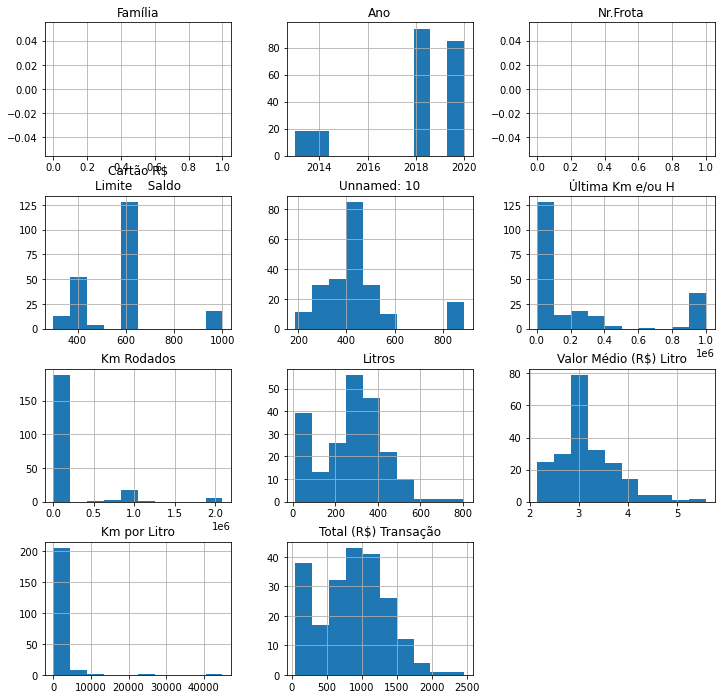

In [72]:
df.hist(figsize=(12,12))

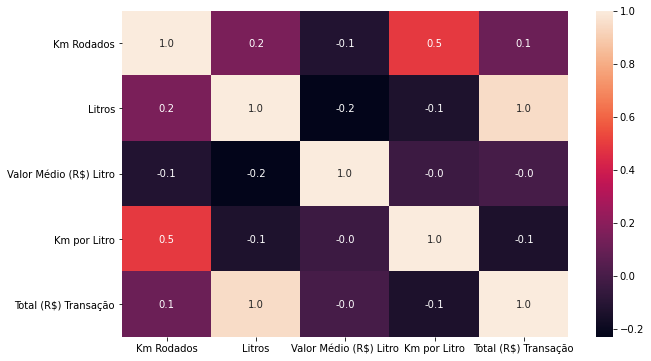

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Km Rodados','Litros','Valor Médio (R$) Litro', 'Km por Litro','Total (R$) Transação']].corr(method = 'pearson'), annot=True, fmt=".1f");

In [74]:
#Valores da tabela pearson


In [92]:
df[['Tipo Combustível']].describe()

,Tipo Combustível
count,215
unique,5
top,ETANOL
freq,159


In [76]:
xis = ['Km Rodados','Litros','Valor Médio (R$) Litro', 'Km por Litro']
ypslon = df['Total (R$) Transação'] 
x = df[xis].values
y = ypslon.values

In [77]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
test_size = 0.3,
random_state = 42)

In [78]:
numeroDeX=len(xis)
escalador = StandardScaler()
escalador.fit(x_treino.reshape(-1,numeroDeX))
x_treino_escalado = escalador.transform(x_treino.reshape(-1,numeroDeX))
x_teste_escalado = escalador.transform(x_teste.reshape(-1,numeroDeX))

In [79]:
formula = LinearRegression().fit(x_treino_escalado.reshape(-1,numeroDeX
), y_treino)
previsaoDeY = formula.predict(x_teste_escalado.reshape(-1,numeroDeX))

In [80]:
r2 = formula.score(x_teste_escalado.reshape(-1,numeroDeX), y_teste)
print('R2:',r2)

R2: 0.9618974505355545


In [81]:
MAE = mean_absolute_error(y_teste,previsaoDeY)
print(MAE)

68.87870721521203


In [82]:
MSE = mean_squared_error(y_teste,previsaoDeY)
print(MSE)


8996.852730447823


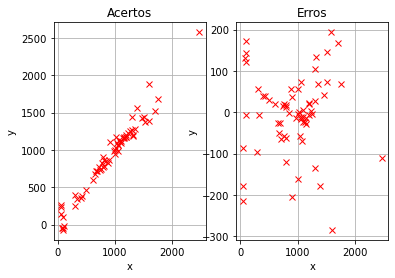

In [83]:
fig, ((ax1,ax2)) = plt.subplots(1,2)
ax1.plot(y_teste, previsaoDeY, 'xr')
ax1.set(xlabel='x', ylabel='y', title='Acertos')
ax1.grid()
erro_linear = y_teste-previsaoDeY
ax2.plot(y_teste, erro_linear, 'xr')
ax2.set(xlabel='x', ylabel='y', title='Erros')
ax2.grid()


Km Rodados R²:  0.011659399590488673
Litros R²:  0.9056436312690486
Valor Médio (R$) Litro R²:  2.641596677510627e-06
Km por Litro R²:  0.018969040667471626


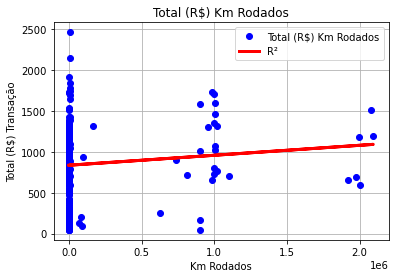

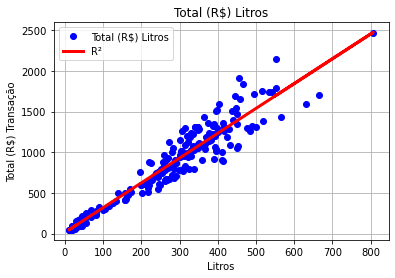

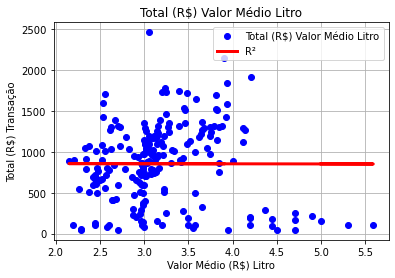

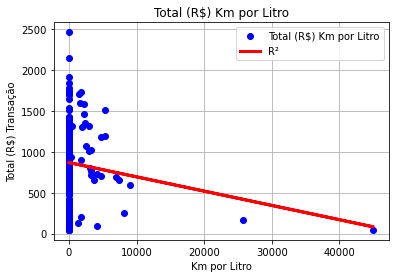

In [84]:
camposTabela = [df['Km Rodados'], df['Litros'],df['Valor Médio (R$) Litro'], df['Km por Litro']]
camposString = ['Total (R$) Km Rodados','Total (R$) Litros','Total (R$) Valor Médio Litro', 'Total (R$) Km por Litro']
camposHorizontal = ['Km Rodados','Litros','Valor Médio (R$) Litro', 'Km por Litro']
camposVertical = ["Total (R$) Transação"]
# Perceba que ao usar o regplot do sns já é traçada uma predição linear
for i in range(len(camposTabela)):
    modelo_regressao = LinearRegression().fit(camposTabela[i].values.reshape(-1,1), df['Total (R$) Transação'])
    fig, ax = plt.subplots()
    ax.plot(camposTabela[i], df['Total (R$) Transação'], 'bo', label = camposString[i])
    plt.plot(camposTabela[i], modelo_regressao.predict(camposTabela[i].values.reshape(-1,1)), 'r', linewidth=3, label='R²')
    ax.set(xlabel=camposHorizontal[i], ylabel=camposVertical[0], title=camposString[i])
    plt.legend()
    ax.grid()
    r2 = modelo_regressao.score(camposTabela[i].values.reshape(-1,1), df['Total (R$) Transação'])
    print(camposHorizontal[i]+' R²: ',r2)

In [85]:
dfTG.describe()

,Litros,Valor Médio (R$) Litro,Km por Litro,Total (R$) Transação
count,16.00,16.00,16.00,16.00
mean,4642.83,3.14,448.33,11558.15
std,777.61,0.41,297.20,3140.06
min,2797.19,2.60,5.67,6157.63
25%,4420.92,2.83,226.46,9681.91
50%,4805.16,3.13,395.40,12343.44
75%,5144.29,3.42,713.23,13284.85
max,5693.09,4.06,900.81,17587.21
